## 선형회귀

- 선형회귀(Linear Regression) : 종속변수 $y$와 한 개 이상의 독립변수 $x$와의 선형 상관관계를 모델링하는 회귀분석 기법
- 일반적으로 예측을 목표하는 통계 분석으로 예측을 하는 방법에 핵심이 되는 개념이 바로 ‘추세선’

### 추세선
- 직선의 추세선 : y=ax+b와, 데이터 x와 y값을 통해 a(기울기)와 b(절편)값, 최적의 회귀 계수를 알아내는 것.
- $y=ax+b$꼴의 수식을 만들고 a와 b의 값을 찾아냄
- 좌표상에서 데이터의 분포와 앞으로의 변화를 가장 잘 설명할 수 있는 하나의 선을 그려내는 것이 궁극적인 목적

### 선형회귀 기초 수식
- 비용 함수(cost function) : 머신러닝에서 최소화해야 할 예측값과 실제값의 차이
- 가설 함수(hypothesis function) : 예측값을 예측하는 함수 $f(x)=h_{\theta}(x)$
    - $x$ : 함수 입력값
    - $\theta$ : 함수 결정값, 가중치 값($w_n$)

    ### 최소자승법

__1. 최소자승법 (Ordinary Least Squares)__
 - 임의의 추세선(=가설초기화)을 기준으로 분포한 x, y의 좌푯값의 차이(=잔차)를 제곱하여 모두 더한 값의 최소가 되는 지점
 - 잔차: 데이터값과 추세선과의 오차

__2. 추세선의 정확도, 표준오차와 회귀계수__
 - 데이터가 다르더라도 동일한 방정식과 회귀계수를 가질 수 있기 때문에, 표준오차의 차이를 확인하여 구분해 볼 수 있음.
     - 표준오차: 회귀선(=추세선)과 데이터 간 차이의 표준값, 회귀(직)선을 기준으로 데이터가 얼마나 잘 모여있거나 퍼져있는지를 표현한 개념
 - 표준오차(SE)가 크면 y값을 추정하는 회귀계수(=추세선)의 우연정도(P-value)가 커지므로 해당 추세선(=회귀식)의 설명력은 떨어짐

__3. 추세선의 정확도, 회귀계수와 t-value__
 - 독립변수와 종속변수 사이 양 또는 음의 상관관계가 전제되어야한다.
     - 두 변수 간의 관계가 없다면(기울기가 0) 의미가 없기 떄문에 검정하기 위해 t-test를 활용
     - t-test: 두 집단의 비교를 위한 평균과 표준편차의 비율 차이를 구하고, 차이가 우연인지 아닌지를 검정

__4. 회귀분석 결과표__
 - t값이 클수록 두 변수 간의 관계가 유의미

### 경사하강법
- 경사하강법(gradient descent) : 경사를 하강하면서 수식을 최소화하는 매개변수의 $x$값을 찾아내는 방법
        - 적용 빈도가 많을 수록 최솟값에 가까워 짐
        - 한 번에 얼마나 많은 공간을 움직일지를 기울기, 즉 경사 정도에 따라 하이퍼 매개변수로 활용


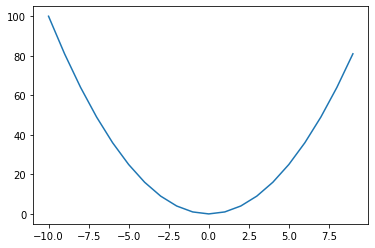

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

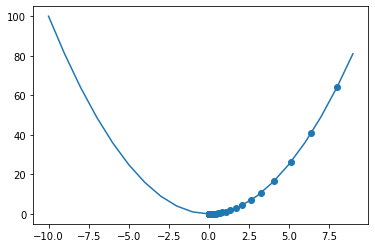

In [2]:
x_new = 10
derivative = []
y = []
learng_rate = 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

### 훈련/테스트 분할
- 훈련/테스트 분할(train/test split) : 머신러닝에서 데이터를 학습을 하기 위한 학습 데이터셋(train dataset)과 학습의 결과로 생성된 모델의 성능을 평가하기 위한 테스트 데이터셋(test dataset)으로 나누는 것
  - 모델이 새로운 데이터셋에도 일반화(generalize)하여 처리할 수 있는지를 확인하기 위함
  - 모델이 데이터에 과다적합(over-fit) : 생성된 모델이 특정 데이터에만 잘 맞아서 해당 데이터셋에 대해서는 성능을 발휘할 수 있지만 새로운 데이터셋에서는 전혀 성능을 낼 수 없음
  - 모델이 데이터에 과소적합(under-fit) : 기존 학습 데이터를 제대로 예측하지 못함

### 홀드아웃 메서드
- 홀드아웃 메서드(hold-out method) : 전체 데이터셋에서 일부를 학습 데이터와 테스트 데이터로 나누는 일반적인 데이터 분할 기법
  - 전체 데이터에서 랜덤하게 학습 데이터셋과 테스트 데이터셋을 나눔
  - 일반적으로 7:3 또는 8:2 정도의 비율

### 선형회귀의 성능 측정 지표
__MAE(Mean Absolute Error) : 평균 절대 잔차__
  - 모든 테스트 데이터에 대해 예측값과 실제값의 차이에 대해 절댓값을 구하고, 이 값을 모두 더한 후에 데이터의 개수만큼 나눈 결과

__RMSE(Root Mean Squared Error) : 평균제곱근 오차__
  - 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균을 낸 후 제곱근을 구하며, MAE보다 값의 차이가 큼
  - 차이가 크게 나는 값에 대해서 페널티를 주고 싶다면 RMSE 값을 사용

__결정계수(R-squared) : 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표__
  - 예측값이 크면 클수록 실제값도 커지고, 예측값이 작으면 실제값도 작아짐
  - 두 개의 모델 중 어떤 모델이 조금 더 상관성이 있는지를 나타낼 수 있지만, 값의 차이 정도가 얼마인지는 나타낼 수 없다는 한계가 있음

In [1]:
import random
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(  # train_test_split : 훈련/테스트 데이터 분할 함수
    X, y, test_size=0.33, random_state=42)

0.5

In [ ]:
# median_absolute_error : MAE를 구하는 함수
from sklearn.metrics import median_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

In [2]:
# mean_squared_error : RMSE를 구하는 함수
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [3]:
# r2_score : 결정계수 구하는 함수
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

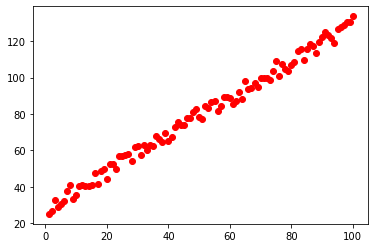

In [4]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = 1  # 데이터 x의 상수항 1
        x[i][1] = i  # 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance  # 데이터 y에 bias 생성
    return x, y


x, y = gen_data(100, 25, 10)  # 100개의 데이터 생성

plt.plot(x[:, 1] + 1, y, "ro")  # 데이터 x와 y의 상관관계 그래프 작성
plt.show()

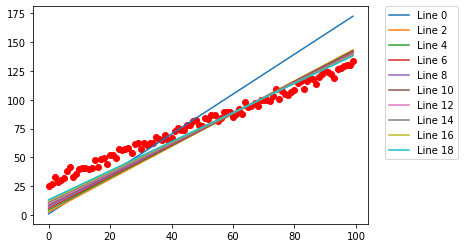

In [5]:
# 생성된 데이터에 경사하강법 적용
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
        if i % 250 == 0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list


m, n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

theta, theta_list, cost_list = gradient_descent(
    x, y, theta, alpha, m, numIterations)

y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:, 1], y, "ro")
for i in range(0, 20, 2):
    plt.plot(x[:, 1], y_predict_step[:, i], label='Line %d' % i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

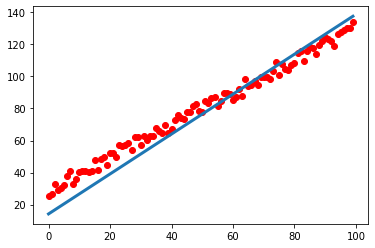

In [6]:
y_predict = np.dot(x, theta)
plt.plot(x[:, 1], y, "ro")
plt.plot(x[:, 1], y_predict, lw=3)
plt.show()

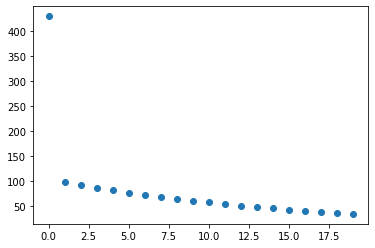

In [7]:
iterations = range(len(cost_list))

plt.scatter(iterations, cost_list)
plt.show()